## Five Link Solver

This notebok solves and graphs the kinematics of a five link suspension

In [15]:
from suspmatics.independent_suspension import Kinematic_Model
from suspmatics import visuals
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from matplotlib import rc



plt.rcParams['xtick.labelsize']=20      # change the tick label size for x axis
plt.rcParams['ytick.labelsize']=20      # change the tick label size for x axis
plt.rcParams['axes.linewidth']=3        # change the line width of the axis
plt.rcParams['xtick.major.width'] = 3   # change the tick line width of x axis
plt.rcParams['ytick.major.width'] = 3   # change the tick line width of y axis 
rc('text', usetex=False)                # disable LaTeX rendering in plots
rc('font',**{'family':'DejaVu Sans'})   # set the font of the plot to be DejaVu Sans

# Configure Geometry

In [16]:
link_lengths = np.array([296.3, 326.8, 377.4, 285.0, 526.2])
frame_pickups = np.array([[70.3, 422.1, -68.1],
                          [110.2, 352.8, 98.8],
                          [198.3, 406.9, 116.8],
                          [-196.6, 434.2, -48.8],
                          [-159.2, 194.9, 137]])
upright_pickups = np.array([[-61.9, -105.5, -82.1],
                          [123.5, -117, 90.3],
                          [-9.3, -98.5, 173.3],
                          [-124.4, -86.8, -68.9],
                          [-79.6, -85.7, 141.9]])


fl = Kinematic_Model.five_link(frame_pickups, link_lengths, upright_pickups)

This creates a matrix of solutions from z=[-100:100]

In [17]:
initial_pos = [(0,0.), (1,800), (2,0), (3,0), (4,0), (5,0)] #these are the solution_mat used to create the initial guess
driving_var = 2 #index of z variable
driving_values = np.linspace(-100, 100) #list of z values used to create the table

solution_mat = fl.create_table(initial_pos, driving_var, driving_values)

Here is the graphing of the wheel position and orientation for various z positions

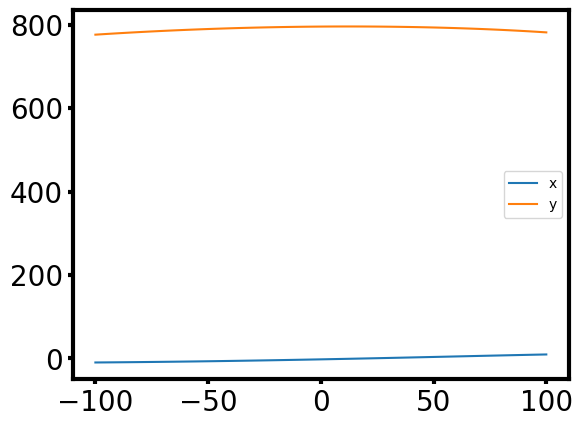

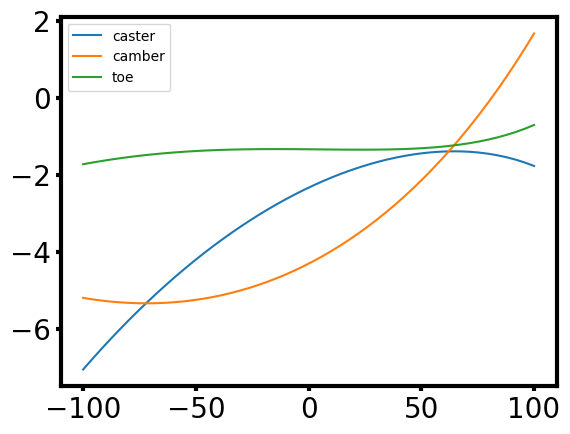

In [18]:
z = solution_mat[:,2]

x = solution_mat[:,0]
y = solution_mat[:,1]
plt.plot(z, x)
plt.plot(z, y)
plt.legend(["x","y"])
plt.show()


caster = solution_mat[:,3]
camber = solution_mat[:,4]
toe = solution_mat[:,5]
plt.plot(z, caster*180/np.pi)
plt.plot(z, camber*180/np.pi)
plt.plot(z, toe*180/np.pi)
plt.legend(["caster", "camber", "toe"])
plt.show()

Animation over the full range of outputs

In [ ]:
r = visuals.Renderer(fl.components)

r.sae_basis_vectors()
r.animate(solution_mat, loops=20, rate=25)

KeyboardInterrupt: 